In [41]:
import numpy as np
import matplotlib.pyplot as plt

Inicjalizacja stałych

In [42]:
l = np.pi  # długość obszaru
n = 100  # liczba punktów siatki
dx = l / n  # odstęp między punktami siatki
dt = 0.02  # krok czasowy
liczba_krokow = 500  # liczba kroków czasowych

Inicjalizacja pozycji (x)

In [43]:
x = np.zeros(n + 1) #pozycje
for i in range(n + 1):
    x[i] = np.sin(i * dx)

#ustawienie struny na poczatku i koncu w miejscu
x[0] = 0
x[-1] = 0

Inicjalizacja prędkości (y) i list energii

In [44]:
y = np.zeros(n+1) #predkosci
ek=[]
ep=[]
ec=[]

wyliczenie przeyspieszenia (a) na podstawie pozycji (x)

𝜕^2𝑦(𝑥,𝑡) / 𝜕𝑥^2 = 𝑦(𝑥𝑖−1,𝑡) − 2 ∗ 𝑦(𝑥𝑖,𝑡) + 𝑦(𝑥𝑖+1,𝑡)/∆𝑥^2 = 𝑎(𝑥𝑖,𝑡)

In [45]:
def przyblizeniePrzyspieszenia(x,dx):
    a = np.zeros(n+1) #predkosci
    for i in range(1,n):
        a[i] = (x[i-1] - 2*x[i] + x[i+1])/dx**2

    return a

Wyliczenie energii na podstawie pozycji i predkosci

𝐸𝑘 = ∑(𝑑𝑥 ∗ 𝑉^2(𝑥𝑖)/2)

𝐸𝑝 = ∑((𝑦(𝑥𝑖+1) − 𝑦(𝑥𝑖))^2/2∆𝑥)

In [46]:
def energie(x,y,dx):
    ek = 0.0
    ep = 0.0
    for i in range(1,n):
        ek += (dx * y[i]**2 )/2
        ep += (x[i+1] - x[i])**2 / dx

    return ek, ep

obliczanie pojedynczego kroku

In [47]:
def krok(x,y,a, dt, dx):
    y2 = np.zeros(n+1)
    for i in range(n+1):
        y2[i] = y[i] + 0.5*a[i]*dt

    xNowe = np.zeros(n+1)
    for i in range(n+1):
        xNowe[i] = x[i] + y2[i]*dt

    yNowe = np.zeros(n+1)
    aNowe = przyblizeniePrzyspieszenia(xNowe,dx)
    for i in range(n+1):
        yNowe[i] = y2[i]+0.5*aNowe[i]*dt

    # "zatrzymanie" koncowych krancow struny
    xNowe[0] = 0
    xNowe[-1] = 0

    return xNowe, yNowe, aNowe

przyspieszenie (a)

In [48]:
a = przyblizeniePrzyspieszenia(x,dx)

Symulacja

In [49]:
for i in range(liczba_krokow):
    x,y,a = krok(x,y,a,dt,dx)
    ekin, epot = energie(x,y,dx)
    ecal = ekin + epot

    ek.append(ekin)
    ep.append(epot)
    ec.append(ecal)

rysowanie wykresu


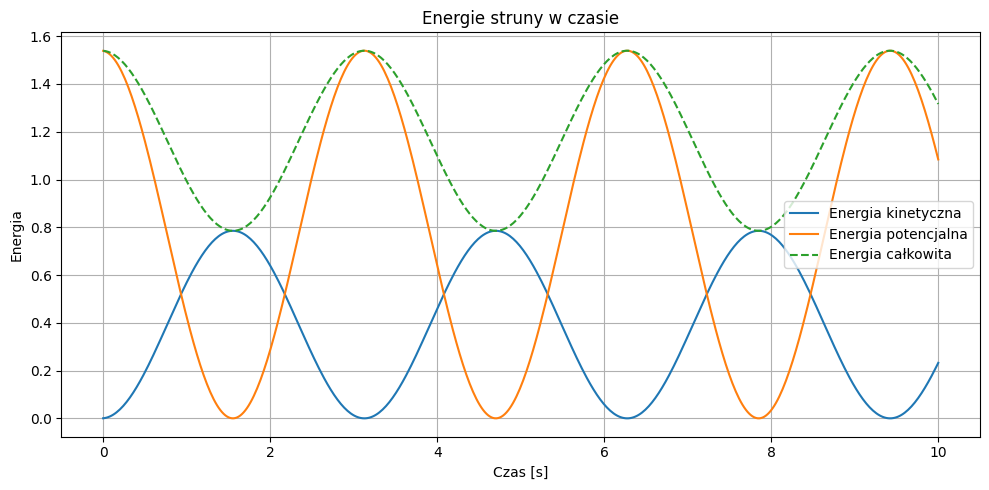

In [50]:
t = np.linspace(0,liczba_krokow*dt,liczba_krokow)

plt.figure(figsize=(10,5))
plt.plot(t, ek, label='Energia kinetyczna')
plt.plot(t, ep, label='Energia potencjalna')
plt.plot(t, ec, label='Energia całkowita', linestyle='--')
plt.xlabel('Czas [s]')
plt.ylabel('Energia')
plt.legend()
plt.title('Energie struny w czasie')
plt.grid(True)
plt.tight_layout()
plt.show()